In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import os
import sys
sys.path.append('../../../B5_NOEMA_30m')
from B5setup import *
import pyspeckit
from spectral_cube import SpectralCube
from astropy.wcs import WCS
from crispy import image_ridge_find, grid_ridge
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
cubefile = '../B5IRS1_H2COa_robust05_multi_3_cut_K_contcorrected'
fitfile1Gtotalaic = cubefile[3:] + '_1G_fitparams_total_aicres.fits'
fitfile2Gtotalaic = cubefile[3:] + '_2G_fitparams_total_aicres.fits'
fitfile3Gtotalaic = cubefile[3:] + '_3G_fitparams_total_aicres.fits'
mask2dfile = cubefile + '_mask.fits'
simcubefile = cubefile[3:] + '_simulated.fits'


In [3]:
# here we create the cubes
cubenormal = SpectralCube.read(cubefile+'.fits')
cubehead = fits.getheader(cubefile+'.fits')

wcshead = WCS(cubehead)
mask2d = fits.getdata(mask2dfile)

params1G = fits.getdata(fitfile1Gtotalaic)
params2G = fits.getdata(fitfile2Gtotalaic)
params3G = fits.getdata(fitfile3Gtotalaic)


In [4]:
# we need the coordinates x, y, v for each velocity component

indexes_1G = np.where(~np.isnan(params1G[1]))
indexes_2G = np.where(~np.isnan(params2G[1]))
indexes_3G = np.where(~np.isnan(params3G[1]))

indexes_total = [indexes_1G, indexes_2G, indexes_2G, indexes_3G, indexes_3G, indexes_3G]

velocities_1G = params1G[1][indexes_1G]
velocities_2G_1 = params2G[1][indexes_2G]
velocities_2G_2 = params2G[4][indexes_2G]
velocities_3G_1 = params3G[1][indexes_3G]
velocities_3G_2 = params3G[4][indexes_3G]
velocities_3G_3 = params3G[7][indexes_3G]

velocities_total = [velocities_1G, velocities_2G_1, velocities_2G_2, velocities_3G_1, velocities_3G_2, velocities_3G_3]
colors = ['C0', 'C1', 'C1', 'C2', 'C2', 'C2']

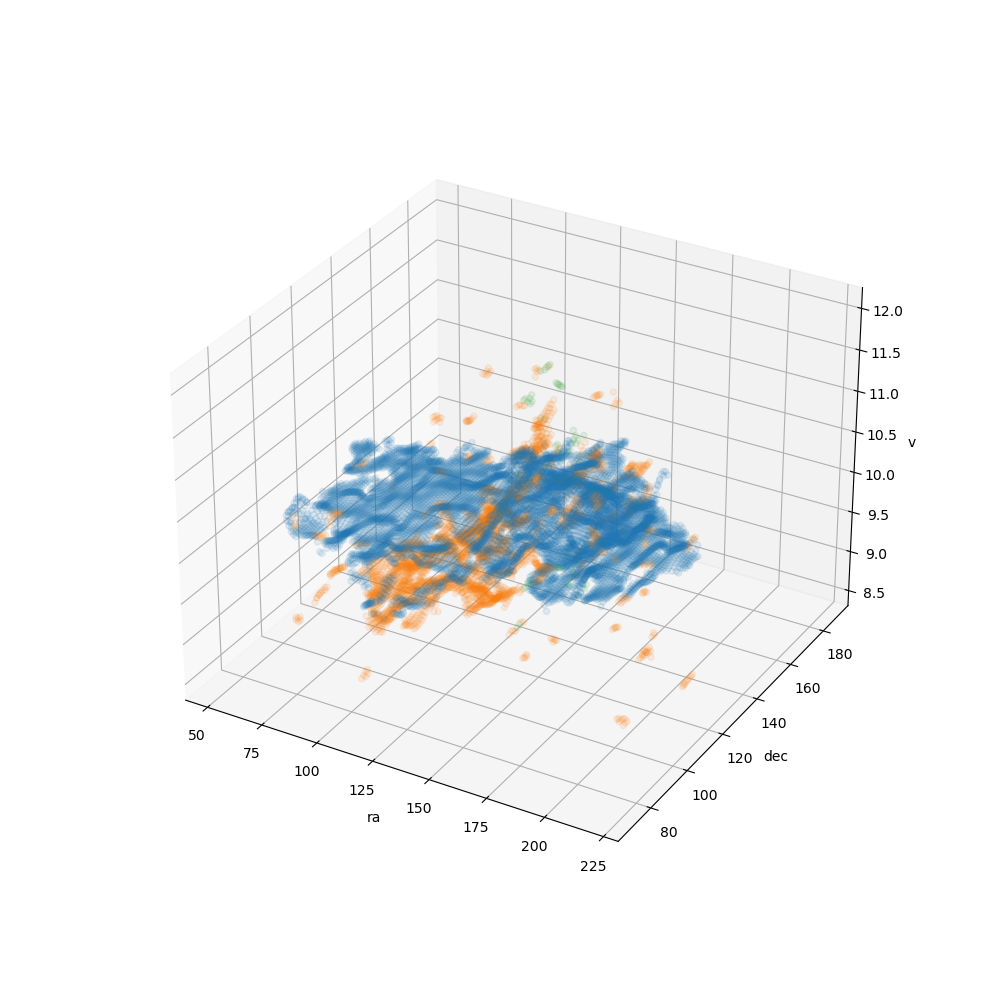

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('v')
for index, vel, color in zip(indexes_total, velocities_total, colors):
    ax.scatter(index[1], index[0], vel, color=color, alpha=0.1)


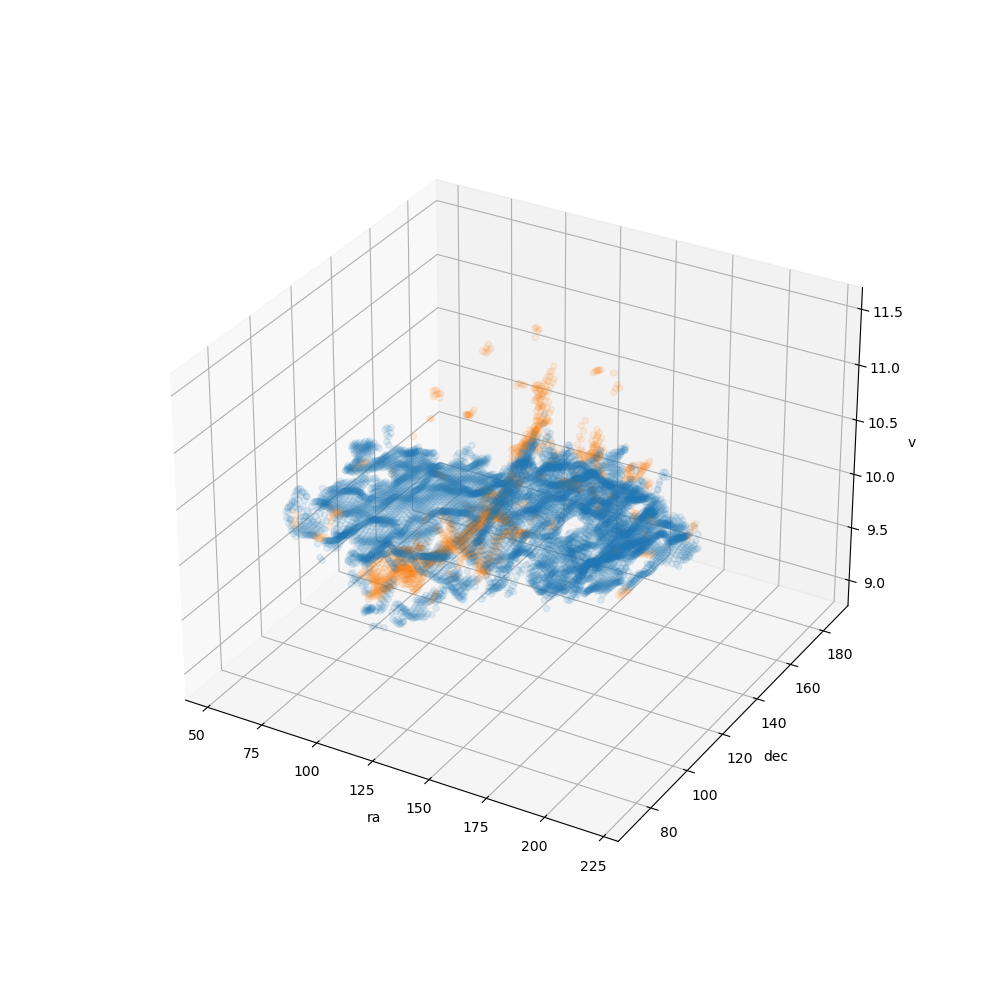

In [6]:
# here we see only the 1g and 2G_1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('v')
ax.scatter(indexes_1G[1], indexes_1G[0], velocities_1G, alpha=0.1)
ax.scatter(indexes_2G[1], indexes_2G[0], velocities_2G_1, alpha=0.1)

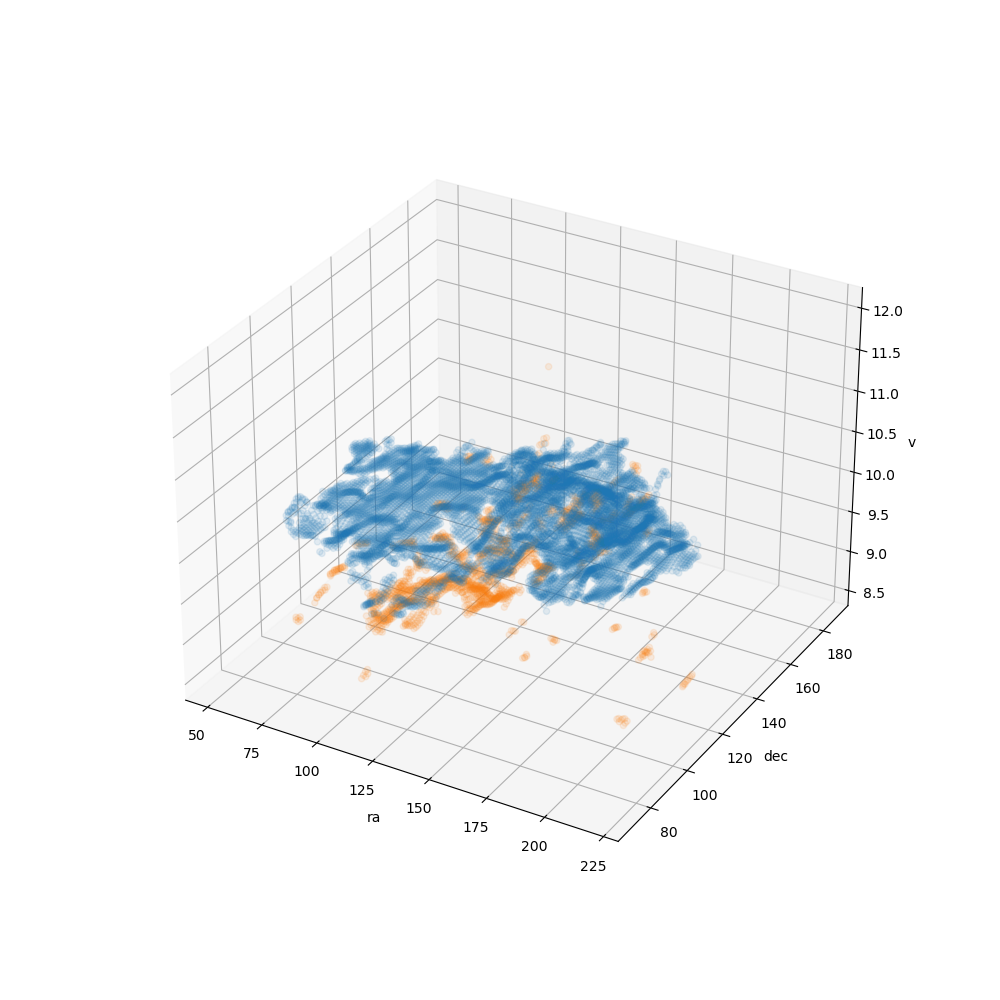

In [7]:
# here we see only the 1g and 2G_2

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('v')
ax.scatter(indexes_1G[1], indexes_1G[0], velocities_1G, alpha=0.1)
ax.scatter(indexes_2G[1], indexes_2G[0], velocities_2G_2, alpha=0.1)